# A Bayesian Network Model of motor and cognitive outcomes in Parkinson’s disease

The purpose of this network is to identify predictors of long-term motor and cognitive outcomes and rate of progression in Parkinson Desease (**PD**).<br>
The data was taken from the paper "A Bayesian mathematical model of motor and cognitive outcomes in Parkinson’s disease" by B. Hayete, D. Wuest, J. Laramie, P. McDonagh, B. Church, S. Eberly, A. Lang, K. Marek, K. Runge, I. Shoulson, A. Singleton, C. Tanner, I. Khalil, A. Verma, B Ravina. <br>

https://journals.plos.org/plosone/article/file?id=10.1371/journal.pone.0178982&type=printable

This research paper involves subjects who were diagnosed with Parkinson's disease and signed up to participate in the LABS-PD study. <br>
In the specific the authors found 244 subjects that were eligible since they fell within certain specifications: 
*   they had never been treated previously 
*   possessed certain genetic characteristics 
*   the have agreed to be followed for a seven-year study

![Grafico del processo](graph_process.png)    

In the specific, the authors focused mainly on two outputs: 
*   the rating of the ***cognition changes***
*   the rating of the ***motor changes***

<u>In this project this study has been shrinked, focusing only on the 4th and 5th years of study.</u> <br>
This choice was made because it is assumed that at that point the research is at an advanced stage and any outliers or problems have been resolved.

The data that is taken involves:
+   **UPDRS** (Unified Parkinson's Desease Rating Scale) which is clinical assessment tool for evaluating the severity and progression of Parkinson's disease.
    *   Part I - *Non-Motor Aspects of Experiences of Daily Living*: focus on non-motor symptoms, including mood, behavior, and cognitive aspects. 
    *   Part II - *Motor Aspects of Experiences of Daily Living*: evaluates the impact of motor symptoms on a patient's ability to perform activities of daily living. 
    *   **Part III** - *Motor Examination*: This section concentrates on the clinical evaluation of motor symptoms, including assessments of tremor, rigidity and others.
    *   Part IV - *Motor Complications*: deals with motor complications and fluctuations associated with the treatment of Parkinson's disease.
    
    In this project, only **Part III** was examined, which deals with the development of motor problems:
    +   shaking
    +   not shaking

*It is important to emphasise the fact that as the study progresses, <u>shaking</u> will be understood as an **increase in tremor**, while <u>not shaking</u> will be understood as a steady state or at least as a **non-worsening of tremor**.*
    <br>
+   *S/E **ADL*** (Swab and England Activities of Daily Living) which provides an assessment of function and autonomy in daily activities of Parkinson's patients.
    *   *0%* →  completly dependent
    *   *50%* → partially dependent
    *   *100%* → completly independent
    
    <br>
+   **UPDRS ADL** is a specific part or section of the UPDRS used to assess the impact of Parkinson's disease on a person's ability to perform daily activities and tasks essential for independent living.
    *   **II stadium**: medium-low impact
    *   **III stadium**: medium-high impact

### Libraries and imports

In [1]:
from pgmpy.models import BayesianModel
from pgmpy.factors.discrete import TabularCPD
from pgmpy.inference import VariableElimination

import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

from pgmpy.sampling import BayesianModelSampling
from pgmpy.factors.discrete import State
from pgmpy.sampling import GibbsSampling

import warnings
warnings.filterwarnings("ignore")

## 1. THE MODEL

A Bayesian network is a probabilistic graphical model that represents a set of variables and their conditional dependencies via directed acyclic graph. <br>
Bayesian networks are ideal for taking an event that occurred and predicting the likelihood that any one of several possible known causes was the contributing factor.

The graph that represent the network is composed by connected nodes which are annotaded with quantitative probability information:

*   each node corresponds to a random variable, which may be discrete or continue
*   a set of direct links that connect pairs of nodes (parents → child)
*   each node $X_{i}$ has a conditional probability distribution $P(X_{i}| Parents(X_{i})$ that quantifies the effect of the parents on the node.

The structure of the network shows the conditional indipendence relationships that hold in the domain.

In this example, the Bayesian network could represent the probabilistic relationships between diseases and symptoms. Given symptoms, the network can be used to compute the probabilities of the presence of various diseases. <br>

### 1.1 Nodes name definition

In [14]:
S_b = 'S/E ADL baseline'
cases = 'Cases in family'
U_m_b = 'UPDRS Motor baseline'
U_A_4 = 'UPDRS ADL 4th year'
U_m_4 = 'UPDRS Motor 4th year'
U_m_5 = 'UPDRS Motor 5th year'

variables = [S_b, cases, U_m_b, U_A_4, U_m_4, U_m_5]

### 1.2 Model definition

In [15]:
model = BayesianModel([(S_b, U_m_b),
                       (cases, U_m_b),
                       (U_m_b, U_m_4),
                       (U_A_4, U_m_4),
                       (U_m_4, U_m_5)])

nodes = list(model.nodes())
edges = list(model.edges())

print('The nodes of the net are: {}'.format(nodes));
print('The edges of the net are: {}'.format(edges));

The nodes of the net are: ['S/E ADL baseline', 'UPDRS Motor baseline', 'Cases in family', 'UPDRS Motor 4th year', 'UPDRS ADL 4th year', 'UPDRS Motor 5th year']
The edges of the net are: [('S/E ADL baseline', 'UPDRS Motor baseline'), ('UPDRS Motor baseline', 'UPDRS Motor 4th year'), ('Cases in family', 'UPDRS Motor baseline'), ('UPDRS Motor 4th year', 'UPDRS Motor 5th year'), ('UPDRS ADL 4th year', 'UPDRS Motor 4th year')]


### 1.3 Model representation

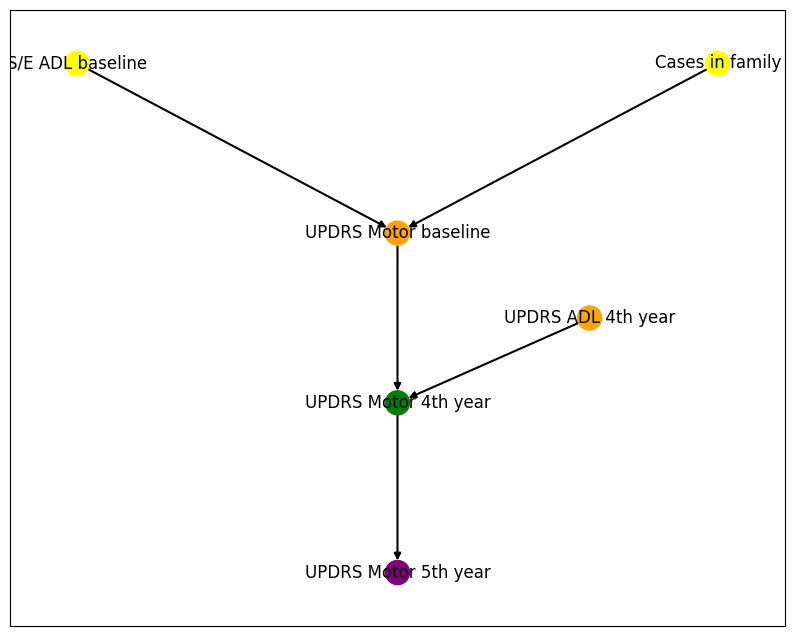

In [16]:
DAG = nx.DiGraph()
DAG.add_edges_from(edges)

node_sizes = [len(node) * 500 for node in DAG.nodes()]
node_colors = ['yellow', 'orange', 'green', 'yellow', 'purple', 'orange']

fig = plt.figure(figsize = (10,8))
pos = {
    'S/E ADL baseline': (0, 0),
    'Cases in family': (1, 0),
    'UPDRS Motor baseline': (0.5, -1),
    'UPDRS ADL 4th year': (0.8, -1.5),
    'UPDRS Motor 4th year': (0.5, -2),
    'UPDRS Motor 5th year': (0.5, -3)
}

nx.draw_networkx_nodes(DAG, pos = pos, node_color = node_colors)
nx.draw_networkx_labels(DAG, pos = pos)
nx.draw_networkx_edges(DAG, pos = pos, edge_color = 'black', width = 1.5, arrows = True)

plt.show()

### 1.4 Graph structure

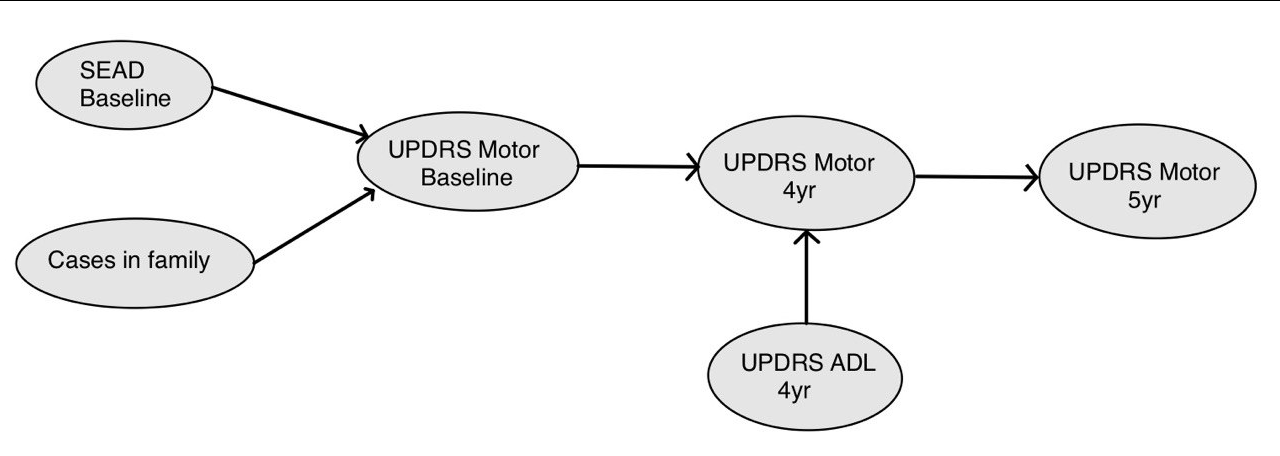

## 2. CPD definition

In probability theory and statistics, a **Conditional Probability Distribution** is a probability distribution that describes the likelihood of an event given the occurrence of another event. In other words, it provides the probability of an outcome within a specified set of conditions.<br>
**CPDs** are used as a form of tabular representation suitable for discrete variables. Each row in a CPD contains the conditional probability of each node value for a conditioning case.

A conditioning case is just a possible combination of values for the parent nodes.

### 2.1 Simple CPD

A **Simple Conditional Probability Distribution** involves the probability distribution of one random variable given the specific value of another random variable. It's often denoted as $P(X|Y)$, where $X$ is the variable of interest, and $Y$ is the condition. <br>
The probability distribution is "simple" when there is only one conditioning variable.

In [17]:
cpds = {}

# P(S_b)
cpd_S_b = TabularCPD(variable = S_b,
                         variable_card = 3,
                         values = [[0.098], 
                                  [0.329],
                                  [0.573]], 
                         state_names = {S_b : ['0%', '50%', '100%']})

print("P(S/E ADL Baseline)")
print(cpd_S_b)

cpds[S_b] = cpd_S_b

P(S/E ADL Baseline)
+------------------------+-------+
| S/E ADL baseline(0%)   | 0.098 |
+------------------------+-------+
| S/E ADL baseline(50%)  | 0.329 |
+------------------------+-------+
| S/E ADL baseline(100%) | 0.573 |
+------------------------+-------+


In [18]:
# P(cases)
cpd_cases = TabularCPD(variable = cases,
                         variable_card = 2,
                         values = [[0.29],
                                   [0.71]],
                         state_names = {cases : ['True', 'False']})

print("P(Cases in family)")
print(cpd_cases)

cpds[cases] = cpd_cases

P(Cases in family)
+------------------------+------+
| Cases in family(True)  | 0.29 |
+------------------------+------+
| Cases in family(False) | 0.71 |
+------------------------+------+


In [19]:
# P(U_A_4)
cpd_U_A_4 = TabularCPD(variable = U_A_4,
                     variable_card = 2,
                     values = [[0.75],
                               [0.25]],
                     state_names = {U_A_4 : ['II', 'III']})

print(" P(U_A_4)")
print(cpd_U_A_4)

cpds[U_A_4] = cpd_U_A_4

 P(U_A_4)
+-------------------------+------+
| UPDRS ADL 4th year(II)  | 0.75 |
+-------------------------+------+
| UPDRS ADL 4th year(III) | 0.25 |
+-------------------------+------+


### CPD with evidence

In more complex scenarios, there might be multiple variables influencing the probability distribution. The **Conditional Probability Distribution with Evidence** involves the probability distribution of a random variable given the specific values or observations of multiple other variables. It's expressed as   $P(X|Y_1, Y_2, ..., Y_n)$  , where $X$ is the variable of interest, and $Y_1, Y_2, ..., Y_n$ are the pieces of evidence.

In [20]:
# P(U_m_b|S_b, cases)
cpd_U_m_b = TabularCPD(variable = U_m_b,
                                   variable_card = 2,
                                   values = [[0.89, 0.91, 0.41, 0.46, 0.29, 0.23], 
                                             [0.11, 0.09, 0.59, 0.54, 0.71, 0.77]],
                                   evidence = [S_b, cases],
                                   evidence_card = [3,2],
                                   state_names = {U_m_b:['shaking', 'not shaking'],
                                                 S_b : ['0%', '50%', '100%'],
                                                 cases : ['True', 'False']
                                                 }
                                   )

print("UPDRS motor baseline P(U_m_b|S_b, cases)")
print(cpd_U_m_b)

cpds[cpd_U_m_b] = cpd_U_m_b


UPDRS motor baseline P(U_m_b|S_b, cases)
+-----------------------------------+-----------------------+------------------------+-----------------------+------------------------+------------------------+------------------------+
| S/E ADL baseline                  | S/E ADL baseline(0%)  | S/E ADL baseline(0%)   | S/E ADL baseline(50%) | S/E ADL baseline(50%)  | S/E ADL baseline(100%) | S/E ADL baseline(100%) |
+-----------------------------------+-----------------------+------------------------+-----------------------+------------------------+------------------------+------------------------+
| Cases in family                   | Cases in family(True) | Cases in family(False) | Cases in family(True) | Cases in family(False) | Cases in family(True)  | Cases in family(False) |
+-----------------------------------+-----------------------+------------------------+-----------------------+------------------------+------------------------+------------------------+
| UPDRS Motor baseline(shakin

In [21]:
# P(U_m_4|U_m_b, U_A_4)
cpd_U_m_4 = TabularCPD(variable = U_m_4,
                                   variable_card = 2,
                                   values = [[0.71, 0.85, 0.81, 0.95],
                                             [0.29, 0.15, 0.19, 0.05]],
                                   evidence = [U_m_b, U_A_4],
                                   evidence_card = [2, 2],
                                   state_names = {U_m_4:['shaking', 'not shaking'],
                                                  U_m_b : ['shaking', 'not shaking'],
                                                  U_A_4 : ['II', 'III']
                                                  }
                                   )

print("UPDRS motor in the 4th year P(U_m_4|U_m_b, U_A_4, HY_4)")
print(cpd_U_m_4)

cpds[cpd_U_m_4] = cpd_U_m_4

UPDRS motor in the 4th year P(U_m_4|U_m_b, U_A_4, HY_4)
+-----------------------------------+-------------------------------+-------------------------------+-----------------------------------+-----------------------------------+
| UPDRS Motor baseline              | UPDRS Motor baseline(shaking) | UPDRS Motor baseline(shaking) | UPDRS Motor baseline(not shaking) | UPDRS Motor baseline(not shaking) |
+-----------------------------------+-------------------------------+-------------------------------+-----------------------------------+-----------------------------------+
| UPDRS ADL 4th year                | UPDRS ADL 4th year(II)        | UPDRS ADL 4th year(III)       | UPDRS ADL 4th year(II)            | UPDRS ADL 4th year(III)           |
+-----------------------------------+-------------------------------+-------------------------------+-----------------------------------+-----------------------------------+
| UPDRS Motor 4th year(shaking)     | 0.71                          | 0.85

In [22]:
# P(U_m_5|U_m_4)
cpd_U_m_5 = TabularCPD(variable = U_m_5,
                                   variable_card = 2,
                                   values = [[0.63, 0.77],
                                             [0.37, 0.23]],
                                   evidence = [U_m_4],
                                   evidence_card = [2],
                                   state_names = {U_m_5:['shaking', 'not shaking'],
                                                  U_m_4 : ['shaking', 'not shaking']
                                                  }
                                   )

print("UPDRS motor in the 5th year P(U_m_5|U_m_4, U_A_5, HY_5)")
print(cpd_U_m_5)

cpds[cpd_U_m_5] = cpd_U_m_5

UPDRS motor in the 5th year P(U_m_5|U_m_4, U_A_5, HY_5)
+-----------------------------------+-------------------------------+-----------------------------------+
| UPDRS Motor 4th year              | UPDRS Motor 4th year(shaking) | UPDRS Motor 4th year(not shaking) |
+-----------------------------------+-------------------------------+-----------------------------------+
| UPDRS Motor 5th year(shaking)     | 0.63                          | 0.77                              |
+-----------------------------------+-------------------------------+-----------------------------------+
| UPDRS Motor 5th year(not shaking) | 0.37                          | 0.23                              |
+-----------------------------------+-------------------------------+-----------------------------------+


In [23]:
values = list(cpds.values())
# print(values)

[model.add_cpds(x) for x in values];

To be sure, we can check if the CPDs are consistent with the nodes and the model:

In [24]:
if model.check_model():
  print("It works!")
else:
  print("Nope!")

It works!


## 3. Independencies

$A$ and $B$ are **independent**, denoted $P\models(A\perp B)$, iff:


*   $P(A|B) = P(A)$
*   $P(B|A) = P(B)$
*   $P(A,B) = P(A) P(B)$

$X$ and $Y$ are **conditionally independent**, given an evidence $Z$, denoted $P\models(X\perp Y, Z)$, iff:

> $P(X, Y|Z) = P(X|Z)P(Y,Z)$




In [25]:
print('There can be made {} valid independence assertions, with respect to the all possible given evidence.'.format(len(model.get_independencies().get_assertions())), "\n")
independencies = model.get_independencies()
# print(independencies) # Output is not shown for compactness sake

for variable in variables:
  print("The local independencies for \'{}\' are:".format(variable), "\n" ,model.local_independencies(variable), "\n\n")

There can be made 108 valid independence assertions, with respect to the all possible given evidence. 

The local independencies for 'S/E ADL baseline' are: 
 (S/E ADL baseline ⟂ UPDRS ADL 4th year, Cases in family) 


The local independencies for 'Cases in family' are: 
 (Cases in family ⟂ UPDRS ADL 4th year, S/E ADL baseline) 


The local independencies for 'UPDRS Motor baseline' are: 
 (UPDRS Motor baseline ⟂ UPDRS ADL 4th year | Cases in family, S/E ADL baseline) 


The local independencies for 'UPDRS ADL 4th year' are: 
 (UPDRS ADL 4th year ⟂ UPDRS Motor baseline, Cases in family, S/E ADL baseline) 


The local independencies for 'UPDRS Motor 4th year' are: 
 (UPDRS Motor 4th year ⟂ Cases in family, S/E ADL baseline | UPDRS Motor baseline, UPDRS ADL 4th year) 


The local independencies for 'UPDRS Motor 5th year' are: 
 (UPDRS Motor 5th year ⟂ UPDRS Motor baseline, UPDRS ADL 4th year, Cases in family, S/E ADL baseline | UPDRS Motor 4th year) 




### 3.1 Markov blanket

The **Markov blanket** of a given <span style="color: blue;">node</span> (in this case marked in <span style="color: blue;">blue</span>) consists in the <span style="color: green;">set</span> (marked in <span style="color: green;">green</span>) of:


*   its parents
*   its children
*   its children's other parents

Each node is conditionally independent of all others, given its Markov Blanket.

The node 'S/E ADL baseline' has Markov blanket: ['UPDRS Motor baseline', 'Cases in family'].




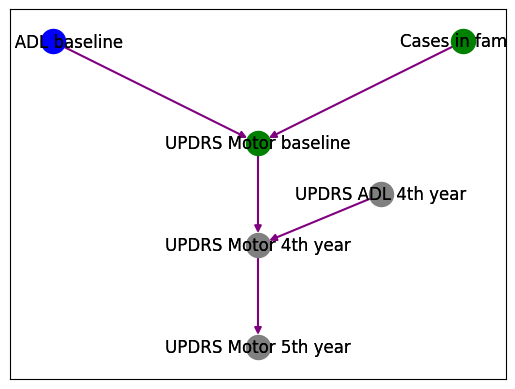



❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈ 

The node 'UPDRS Motor baseline' has Markov blanket: ['Cases in family', 'UPDRS Motor 4th year', 'S/E ADL baseline', 'UPDRS ADL 4th year'].




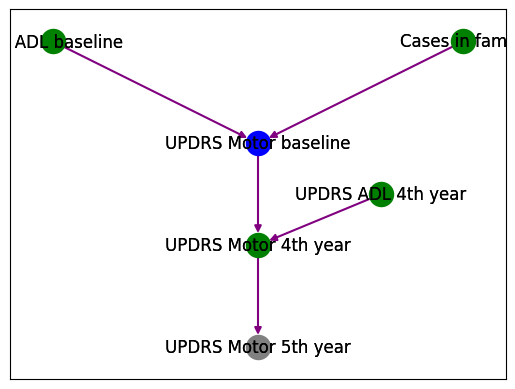



❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈ 

The node 'Cases in family' has Markov blanket: ['UPDRS Motor baseline', 'S/E ADL baseline'].




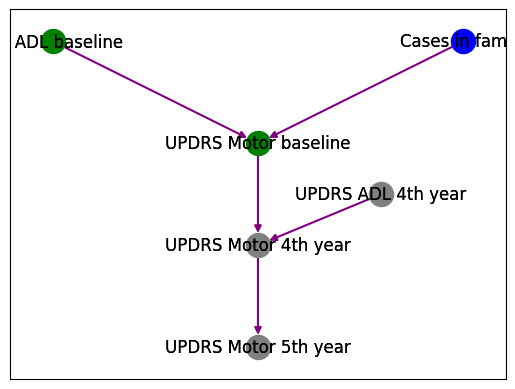



❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈ 

The node 'UPDRS Motor 4th year' has Markov blanket: ['UPDRS Motor baseline', 'UPDRS Motor 5th year', 'UPDRS ADL 4th year'].




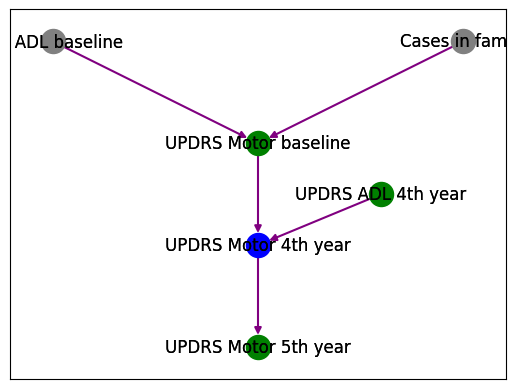



❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈ 

The node 'UPDRS ADL 4th year' has Markov blanket: ['UPDRS Motor baseline', 'UPDRS Motor 4th year'].




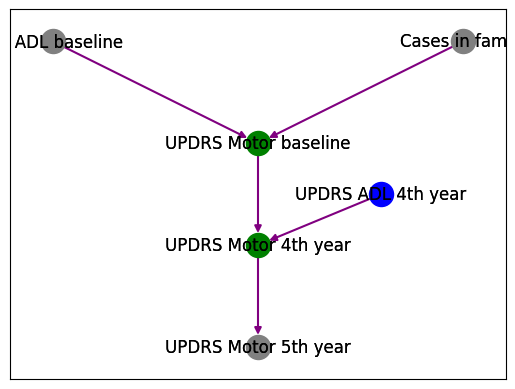



❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈❈ 



In [26]:
leaves = model.get_leaves()
markov_blanket = {}

for node in nodes:
    if not node in leaves:
        markov_blanket[node] = model.get_markov_blanket(node)
        print('The node \'{}\' has Markov blanket: {}.'.format(node, markov_blanket[node]))
        print('\n')

        nx.draw_networkx_nodes(DAG, pos, nodelist = [node], node_color = 'blue')
        nx.draw_networkx_nodes(DAG, pos, nodelist = markov_blanket[node], node_color = 'green')
        nx.draw_networkx_nodes(DAG, pos,
               nodelist = [n for n in nodes if n not in markov_blanket[node] and n != node],
               node_color = 'grey')
        nx.draw_networkx_labels(DAG, pos)
        nx.draw_networkx_labels(DAG, pos)
        nx.draw_networkx_edges(DAG, pos, edge_color = 'purple', width = 1.5, arrows = True)
        plt.show()

        print('\n')
        print("❈"*85,"\n")

## 4. Queries

The basic task for any probabilistic inference system is to compute the posterior probability distribution for a set of **query variables**, given some observed event,
that is some assignment of values to a set of **evidence values**.

### 4.1 Exact inference with variable elimination

The variable elimination method is widely used for exact inference in probabilistic graphical models. It enhances inference by enumeration, where queries with repeated subexpressions are evaluated only once using dynamic programming.

The choice of variable order influences the intermediate factors generated during the calculation, but any order leads to a valid algorithm.

It is difficult to use to determine the optimal ordering, but several good heuristics are available:

- **MinFill:** Minimizes the number of edges added to the graph during elimination.
- **MinNeighbors:** Minimizes the number of neighbors in the current graph.
- **MinWeight:** Minimizes the product of weights (domain cardinality) of its neighbors.
- **WeightedMinFill:** Minimizes the sum of weights of edges added to the graph during elimination, where edge weight is the product of the weights of its vertices.

The efficiency of variable elimination depends on the size of the largest factor constructed during the algorithm, influenced by the order of variable elimination and the network structure.

Determining the optimal order is computationally challenging, but these heuristics help manage the time and space requirements of the variable elimination algorithm.


In [27]:
exact_inference_variable_elimination = VariableElimination(model)

As a first query we can check what is the probability of having motor impediments in the fourth year.

In [28]:
print('P(motor impediments in the 4th year)')
query1 = exact_inference_variable_elimination.query([U_m_4], show_progress = False);
print(query1)

P(motor impediments in the 4th year)
+-----------------------------------+-----------------------------+
| UPDRS Motor 4th year              |   phi(UPDRS Motor 4th year) |
+===================================+=============================+
| UPDRS Motor 4th year(shaking)     |                      0.8073 |
+-----------------------------------+-----------------------------+
| UPDRS Motor 4th year(not shaking) |                      0.1927 |
+-----------------------------------+-----------------------------+


The **first query** proves that there is a high possibility that by the fourth year the patient has already started to have tremors.

In [29]:
print('P(motor impediments in the 4th year|Parkinson\'s cases in the family)')
query2 = exact_inference_variable_elimination.query([U_m_4], {cases: 'True'}, show_progress = False);
query3 = exact_inference_variable_elimination.query([cases], {U_m_5: 'shaking'}, show_progress=False)
print(query2)
print('\n')
print('P(Parkinson\'s cases in the family | worsening of symptoms in the fifth year):')
print(query3)

P(motor impediments in the 4th year|Parkinson's cases in the family)
+-----------------------------------+-----------------------------+
| UPDRS Motor 4th year              |   phi(UPDRS Motor 4th year) |
+===================================+=============================+
| UPDRS Motor 4th year(shaking)     |                      0.8062 |
+-----------------------------------+-----------------------------+
| UPDRS Motor 4th year(not shaking) |                      0.1938 |
+-----------------------------------+-----------------------------+


P(Parkinson's cases in the family | worsening of symptoms in the fifth year):
+------------------------+------------------------+
| Cases in family        |   phi(Cases in family) |
+========================+========================+
| Cases in family(True)  |                 0.2901 |
+------------------------+------------------------+
| Cases in family(False) |                 0.7099 |
+------------------------+------------------------+


The **second** and the **third queries** prove that having a family history of Parkinson's is not a decisive factor, but only slightly increases the likelihood of having the disease.

In [30]:
print('P(motor impediments in the 4th year|not having impediments at the beginning)')
query4 = exact_inference_variable_elimination.query([U_m_4], {U_m_b: 'not shaking'}, show_progress = False);
print(query4)

P(motor impediments in the 4th year|not having impediments at the beginning)
+-----------------------------------+-----------------------------+
| UPDRS Motor 4th year              |   phi(UPDRS Motor 4th year) |
+===================================+=============================+
| UPDRS Motor 4th year(shaking)     |                      0.8450 |
+-----------------------------------+-----------------------------+
| UPDRS Motor 4th year(not shaking) |                      0.1550 |
+-----------------------------------+-----------------------------+


The **fourth query** shows that even if the patient had no tremor or motor impairment at the beginning, it is very likely that there will be a worsening of symptoms in the fourth year.

In [31]:
print('P(motor impediments in the 4th year|Being completly independent in the beginning and without Parkinson\'s cases in the family)')
query5 = exact_inference_variable_elimination.query([U_m_4], {S_b: '100%', cases: 'False'}, show_progress = False);
print(query5)

P(motor impediments in the 4th year|Being completly independent in the beginning and without Parkinson's cases in the family)
+-----------------------------------+-----------------------------+
| UPDRS Motor 4th year              |   phi(UPDRS Motor 4th year) |
+===================================+=============================+
| UPDRS Motor 4th year(shaking)     |                      0.8220 |
+-----------------------------------+-----------------------------+
| UPDRS Motor 4th year(not shaking) |                      0.1780 |
+-----------------------------------+-----------------------------+


The **fifth query** proves that even if there is no case in the family and if the patient was completly independent in the daily chores, a worsening of mobility and tremors is very likely to occur.

In [34]:
print('P(motor impediments in the 4th year|having impediments at the beginning and reaching the II level in the ADL scale)')
query6 = exact_inference_variable_elimination.query([U_m_4], {U_m_b : 'shaking', U_A_4 : 'II'}, show_progress = False);
query7 = exact_inference_variable_elimination.query([U_m_4], {U_m_b : 'not shaking', U_A_4 : 'II'}, show_progress = False);
print(query6)
print('\n')
print('P(motor impediments in the 4th year|not having impediments at the beginning and reaching the II level in the ADL scale)')
print(query7)


P(motor impediments in the 4th year|having impediments at the beginning and reaching the II level in the ADL scale)
+-----------------------------------+-----------------------------+
| UPDRS Motor 4th year              |   phi(UPDRS Motor 4th year) |
+===================================+=============================+
| UPDRS Motor 4th year(shaking)     |                      0.7100 |
+-----------------------------------+-----------------------------+
| UPDRS Motor 4th year(not shaking) |                      0.2900 |
+-----------------------------------+-----------------------------+


P(motor impediments in the 4th year|not having impediments at the beginning and reaching the II level in the ADL scale)
+-----------------------------------+-----------------------------+
| UPDRS Motor 4th year              |   phi(UPDRS Motor 4th year) |
+===================================+=============================+
| UPDRS Motor 4th year(shaking)     |                      0.8100 |
+-------------

The **sixth** and the **seventh queries** prove that a subject that didn't have any particular problem in the beginning of the study had a worsening of the symptoms with a major impact with respect with the patients that already had tremor. <br>
None the less, it is considered the II level of the ADL scale, which is the lowest one considered in this project, so the symptoms don't have a huge impact on the patient.

Now we can check what is the probability of having motor impediments in the fifth year.

It is quite evident that the likelihood of deterioration from one year to the next is lower than between the first and fourth year. 

In [35]:
print('P(motor impediments in the 5th year)')
query8 = exact_inference_variable_elimination.query([U_m_5], show_progress=False)
print(query8)

P(motor impediments in the 5th year)
+-----------------------------------+-----------------------------+
| UPDRS Motor 5th year              |   phi(UPDRS Motor 5th year) |
+===================================+=============================+
| UPDRS Motor 5th year(shaking)     |                      0.6570 |
+-----------------------------------+-----------------------------+
| UPDRS Motor 5th year(not shaking) |                      0.3430 |
+-----------------------------------+-----------------------------+


In [36]:
print('P(motor impediments in the 5th year|having impediments at the beginning and reaching the III level in the ADL scale):')
query9 = exact_inference_variable_elimination.query([U_m_5], {U_m_b: 'shaking', U_A_4: 'III'}, show_progress=False)
print(query9)
print('\n')
print('P(motor impediments in the 5th year|not having impediments at the beginning and reaching the III level in the ADL scale):')
query10 = exact_inference_variable_elimination.query([U_m_5], {U_m_b: 'not shaking', U_A_4: 'III'}, show_progress=False)
print(query10)

P(motor impediments in the 5th year|having impediments at the beginning and reaching the III level in the ADL scale):
+-----------------------------------+-----------------------------+
| UPDRS Motor 5th year              |   phi(UPDRS Motor 5th year) |
+===================================+=============================+
| UPDRS Motor 5th year(shaking)     |                      0.6510 |
+-----------------------------------+-----------------------------+
| UPDRS Motor 5th year(not shaking) |                      0.3490 |
+-----------------------------------+-----------------------------+


P(motor impediments in the 5th year|not having impediments at the beginning and reaching the III level in the ADL scale):
+-----------------------------------+-----------------------------+
| UPDRS Motor 5th year              |   phi(UPDRS Motor 5th year) |
+===================================+=============================+
| UPDRS Motor 5th year(shaking)     |                      0.6370 |
+---------

The **nineth** and the **thenth queries** prove that prove that if the patient by the fifth year has reached level III and had already motor impediments when the study started, he will certainly have a more noticeable deterioration than a patient who didn't have problems with movement, since the III level is the worst considered in this project. <br>
Since the patient already had an advanced stadium of the desease, the probability to have a worse situation is higher.

In [37]:
print('P(motor impediments in the 5th year | having impediments in the 4th year)')
query11 = exact_inference_variable_elimination.query([U_m_5], {U_m_4: 'shaking'}, show_progress=False)
print(query11)
print('P(motor impediments in the 5th year | not having impediments in the 4th year)')
query12 = exact_inference_variable_elimination.query([U_m_5], {U_m_4: 'not shaking'}, show_progress=False)
print(query12)

P(motor impediments in the 5th year | having impediments in the 4th year)
+-----------------------------------+-----------------------------+
| UPDRS Motor 5th year              |   phi(UPDRS Motor 5th year) |
+===================================+=============================+
| UPDRS Motor 5th year(shaking)     |                      0.6300 |
+-----------------------------------+-----------------------------+
| UPDRS Motor 5th year(not shaking) |                      0.3700 |
+-----------------------------------+-----------------------------+
P(motor impediments in the 5th year | not having impediments in the 4th year)
+-----------------------------------+-----------------------------+
| UPDRS Motor 5th year              |   phi(UPDRS Motor 5th year) |
+===================================+=============================+
| UPDRS Motor 5th year(shaking)     |                      0.7700 |
+-----------------------------------+-----------------------------+
| UPDRS Motor 5th year(not shaki

It is therefore fair to make some assumptions:
+   patients with cases in the family are not more likely to have the disease;
+   with the passage of time, the disease obviously progresses, but subjects who already had motor difficulties at the beginning of the study will have a greater deterioration than those with mild symptoms;
+   at shorter time intervals, subjects who had fewer motor difficulties have a more significant worsening than those who already had problems the year before.

### 4.2 Approximate inference

In [40]:
''' Reference query for comparison'''
reference_query = exact_inference_variable_elimination.query([U_m_4], {cases : 'True', U_A_4 : 'II'}, show_progress = False).values[1]
print('P(doesn\'t have motor impediments in the 4th year| with Parkinson\'s cases in the family and has reached the II level in the 4th year) = {}.'.format(reference_query))

P(doesn't have motor impediments in the 4th year| with Parkinson's cases in the family and has reached the II level in the 4th year) = 0.22882799999999998.


In [41]:
inference = BayesianModelSampling(model)

evidences = [State(cases, 'True'), State(U_A_4, 'II')]
verbose = False
sample_size = 10

def prob_LW(samples, variable):
    return round(np.sum(np.dot(samples[variable], samples['_weight']))/np.sum(samples['_weight']), 2)

def relative_error(exact_value, approx_value):
    return np.absolute((exact_value - approx_value)/exact_value)

def absolute_error(exact_value, approx_value):
    return np.absolute(exact_value - approx_value)

def run_experiment(sample_size):
    # Sample
    samples_LW = inference.likelihood_weighted_sample(evidence = evidences,
                                                      size = sample_size,
                                                      return_type = 'recarray')

    samples_RS = inference.rejection_sample(evidence = evidences,
                                            size = sample_size,
                                            return_type = 'recarray')

    # Statistics
    query_LW = prob_LW(samples_LW, U_m_4)
    query_RS = np.recarray.mean(samples_RS[U_m_4], axis = 0)


    # Return results
    return np.array([(sample_size,
                      query_RS, absolute_error(reference_query, query_RS),
                      query_LW, absolute_error(reference_query, query_LW))],
                    dtype = [('sample_size', '<i8'),
                             ('query_RS', '<f8'),('e_query_RS', '<f8'),
                             ('query_LW', '<f8'),('e_query_LW', '<f8')])

In [42]:
results = np.array([], dtype = [('sample_size', '<i8'),
                                ('query_RS', '<f8'), ('e_query_RS', '<f8'),
                                ('query_LW', '<f8'), ('e_query_LW', '<f8')])

starting_size_ = 1
final_size = 5
experiments = 10

for size in np.logspace(starting_size_, final_size, num = experiments, dtype = '<i8'):
  results = np.append(results, run_experiment(size))

print(results)

Generating for node: UPDRS Motor 5th year: 100%|██████████| 6/6 [00:00<00:00, 160.17it/s]
38it [00:00, 274.39it/s]              
Generating for node: UPDRS Motor 5th year: 100%|██████████| 6/6 [00:00<00:00, 191.95it/s]
34it [00:00, 469.09it/s]              
Generating for node: UPDRS Motor 5th year: 100%|██████████| 6/6 [00:00<00:00, 193.32it/s]
86it [00:00, 1257.63it/s]             
  0%|          | 0/215 [00:00<?, ?it/s]

Generating for node: UPDRS Motor 5th year: 100%|██████████| 6/6 [00:00<00:00, 152.66it/s]
299it [00:00, 3636.00it/s]             
Generating for node: UPDRS Motor 5th year: 100%|██████████| 6/6 [00:00<00:00, 63.02it/s]
821it [00:00, 4703.46it/s]             
Generating for node: UPDRS Motor 5th year: 100%|██████████| 6/6 [00:00<00:00, 15.87it/s]
2261it [00:00, 3888.83it/s]                         
Generating for node: UPDRS Motor 5th year: 100%|██████████| 6/6 [00:00<00:00, 14.23it/s]
6070it [00:00, 9004.11it/s]                          
Generating for node: UPDRS Motor 5th year: 100%|██████████| 6/6 [00:01<00:00,  5.54it/s]
17205it [00:01, 12016.94it/s]                          
Generating for node: UPDRS Motor 5th year: 100%|██████████| 6/6 [00:02<00:00,  2.31it/s]
47796it [00:03, 13215.41it/s]                           
Generating for node: UPDRS Motor 5th year: 100%|██████████| 6/6 [00:08<00:00,  1.35s/it]
133723it [00:10, 12452.37it/s]                           

[(    10, 0.1       , 0.128828  , 0.4 , 0.171172)
 (    27, 0.22222222, 0.00660578, 0.15, 0.078828)
 (    77, 0.24675325, 0.01792525, 0.19, 0.038828)
 (   215, 0.20465116, 0.02417684, 0.22, 0.008828)
 (   599, 0.24540902, 0.01658102, 0.25, 0.021172)
 (  1668, 0.21282974, 0.01599826, 0.23, 0.001172)
 (  4641, 0.22495152, 0.00387648, 0.23, 0.001172)
 ( 12915, 0.23042973, 0.00160173, 0.23, 0.001172)
 ( 35938, 0.22970115, 0.00087315, 0.23, 0.001172)
 (100000, 0.22911   , 0.000282  , 0.23, 0.001172)]


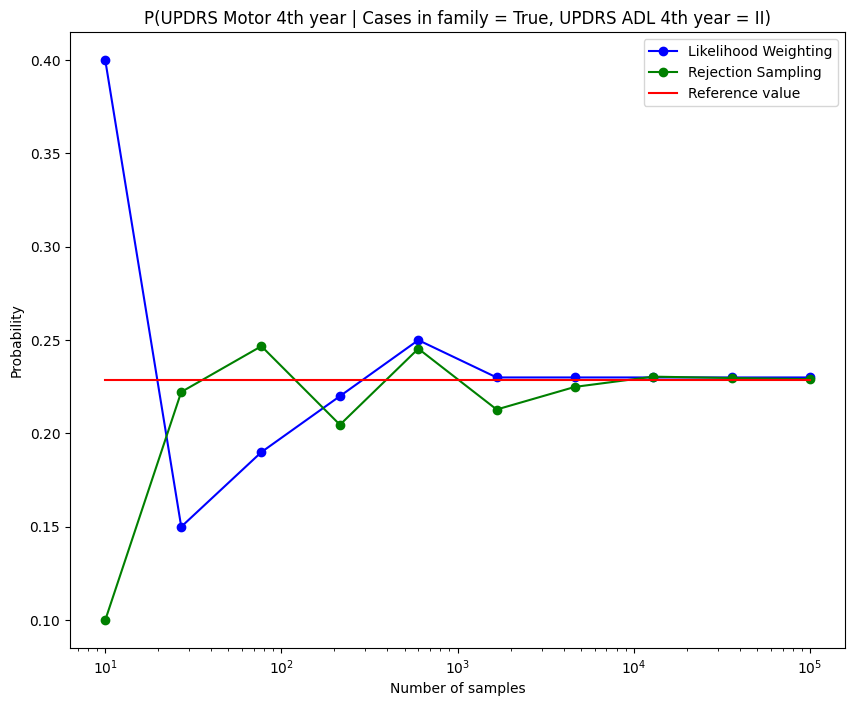

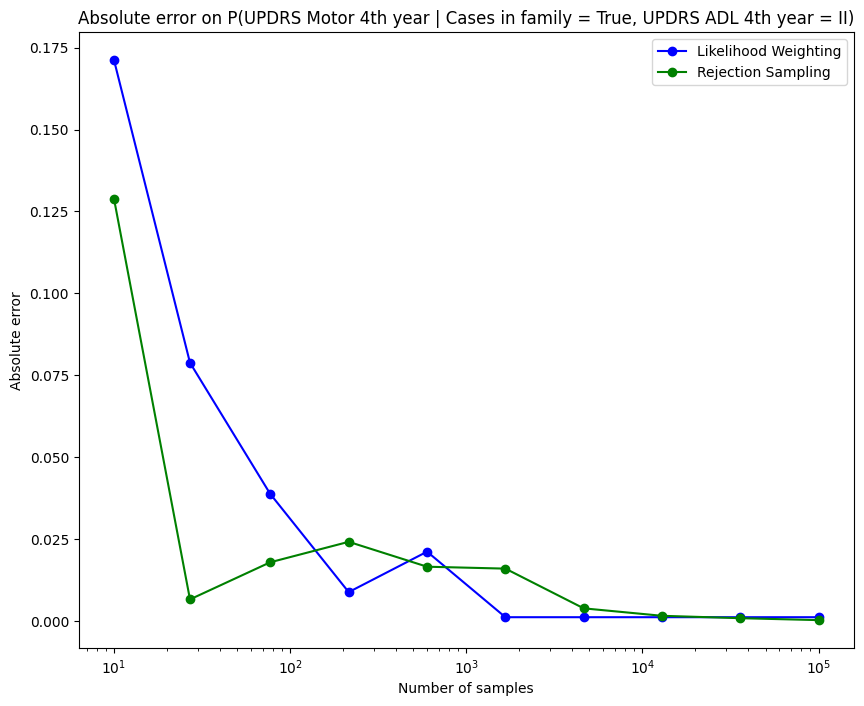

In [43]:
''' Comparison '''
plt.figure(figsize = (10, 8))
# Plot 1

plt.xlabel("Number of samples")
plt.ylabel("Probability")
plt.title(f'P({U_m_4} | {cases} = True, {U_A_4} = II)')
LWCplot, = plt.semilogx(results['sample_size'],
                        results['query_LW'],
                        '-bo',
                        label = "Likelihood Weighting")

RSCplot, = plt.semilogx(results['sample_size'],
                        results['query_RS'],
                        '-go',
                        label = "Rejection Sampling")

VECplot, = plt.semilogx(results['sample_size'],
                        reference_query*np.ones(results.size),
                        'r',
                        label = "Reference value")

plt.legend(handles = [LWCplot, RSCplot, VECplot])

plt.show()
# Plot 2
plt.figure(figsize = (10, 8))

plt.xlabel("Number of samples")
plt.ylabel("Absolute error")
plt.title(f'Absolute error on P({U_m_4} | {cases} = True, {U_A_4} = II)')
ELWCplot, = plt.semilogx(results['sample_size'],
                         results['e_query_LW'],
                         'bo-',
                         label = "Likelihood Weighting")

ERSCplot, = plt.semilogx(results['sample_size'],
                         results['e_query_RS'],
                         'go-',
                         label = "Rejection Sampling")

plt.legend(handles = [ELWCplot, ERSCplot])

plt.show()

## 5. Conclusion and future developments

This project was based on only a portion of the analyzed paper, reporting only what seemed to be the crucial points of the study.<br>
The data used are therefore to be interpreted as partial, as the first three years of the study and the continuum were ignored.<br>

Nevertheless, it was possible to get a general and explanatory picture of the Parkinson's disease study:
+   patients who have cases in their families are no more likely to become ill than those who do not have cases in family;
+   the development of the disease over the years varies from patient to patient, but there is evidence that those who present with tremor early on will have a more noticeable worsening.


A possible development that could be made would certainly be to add the missing data so as to widen the net and have a more detailed prediction.